Student Name:Gloria Figueroa
Student ID:19226225

Please use this notebook to work on Task 2. You should not import any additional modules.

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [3]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

TEST DATA

In [256]:
a_x = 0.05
a_y= 10

In [257]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning toolboxes.


In [281]:
data.shape
#print(data)

(20, 2)

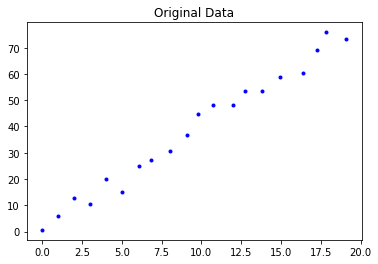

In [282]:
# plotting data 
plt.scatter(data[:,0], data[:,1], color= "blue", marker= ".") 
plt.title("Original Data")
plt.show() 

### Manual calculation
Trying the manual calculation before to understand the internal process in sklearn.decomposition

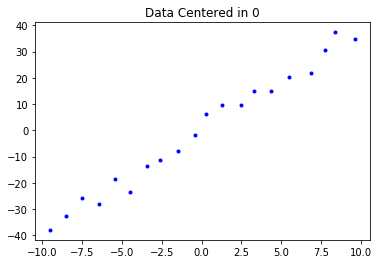

In [303]:
# Centering data
mean = np.mean(data,axis=0) 
data_centered = data - mean 

# plotting data 
plt.scatter(data_centered[:,0], data_centered[:,1], color= "blue", marker= ".") 
plt.title("Data Centered in 0")
plt.show() 

In [322]:
#Getting the covariance
# sigma = np.cov(data_centered, rowvar=False) #using numpy
sigma = np.dot( data_centered.T ,data_centered) / (20-1) #manual calculation of covariance
print(sigma)
# getting eigen vectors of sigma
eigen_values,eigen_vectors = np.linalg.eig(sigma)
# u,s,v = np.linalg.svd(sigma) #using singular value decomposition
print(eigen_vectors)
print(eigen_values)
max_variance_index = np.where(eigen_values == np.amax(eigen_values)) #getting eigenvalue with the biggest value, this mean where the data is more spread

principal_component = ev[:,max_variance_index[0]].reshape(2,1) #principal component with the biggest value

data_1D = np.dot(data_centered, principal_component) #projecting the data to the principal component vector


[[ 35.13541354 137.07457799]
 [137.07457799 544.44271276]]
[[-0.96967479 -0.24439888]
 [ 0.24439888 -0.96967479]]
[  0.5868481 578.9912782]


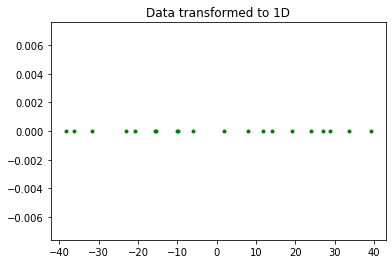

In [297]:
# plotting data 
plt.scatter(data_1D, [0]*len(data_1D), color= "green", marker= ".") 
plt.title("Data transformed to 1D")
plt.show() 

In [305]:
#inverse  = np.dot(data_1D.reshape(20,1),principal_component.T)+mean

### Implementation using PCA library

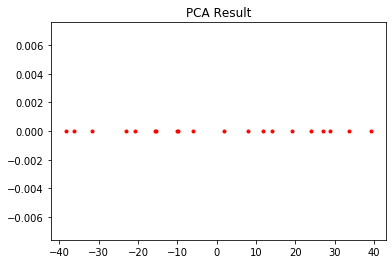

In [294]:
pca = PCA(n_components=1)
data_res = pca.fit_transform(data)
# plotting
plt.scatter(data_res, [0]*len(data_res), color= "red", marker= ".") 
plt.title("PCA Result")
plt.show() 

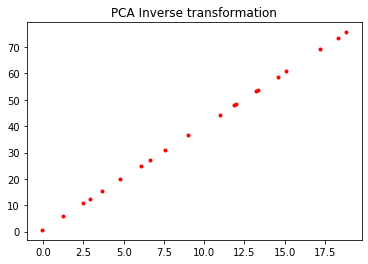

In [295]:
inv_data = pca.inverse_transform(data_res)
plt.scatter(inv_data[:,0], inv_data[:,1], color= "red", marker= ".") 
plt.title("PCA Inverse transformation")
plt.show() 

## Manual inverse transformation

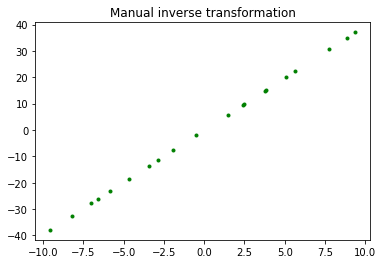

In [296]:
#manual inverse transformation
manual_inv_trans =np.dot(data_res,pca.components_) 
plt.scatter(manual_inv_trans[:,0], manual_inv_trans[:,1], color= "green", marker= ".") 
plt.title("Manual inverse transformation")
plt.show() 

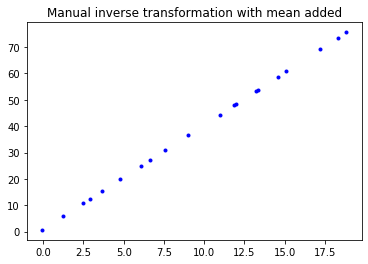

In [318]:
#manual inverse transformation adding the mean
manual_inv_trans_mean = manual_inv_trans + pca.mean_
plt.scatter(manual_inv_trans_mean[:,0], manual_inv_trans_mean[:,1], color= "blue", marker= ".") 
plt.title("Manual inverse transformation with mean added")
plt.show() 